<a href="https://colab.research.google.com/github/daddyawesome/PythonStat/blob/master/10_minutes_PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This guide comes directly from the [10 Minute Guide to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) on the Pandas official website. I ported it into this kernel to make the code more accessible. This guide is geared towards beginners who haven't used Pandas before. It has great examples on how powerful Pandas can be. Enjoy!

### This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
See the [Data Structure Intro section](Data Structure Intro section). Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a numpy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20141101', periods=6)
dates

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates,columns=['one','two','three','four'])
df

,one,two,three,four
2014-11-01,0.977333,-0.603178,0.119375,-0.446140
2014-11-02,0.165023,-0.508143,0.001456,0.643376
2014-11-03,0.429971,-0.848484,-1.025006,0.892447
2014-11-04,-1.079263,-0.926630,-3.083885,0.068161
2014-11-05,0.388456,0.427070,0.466814,0.622423
2014-11-06,-0.693551,-0.092560,1.550926,-0.534368


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
   ....: 
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes):

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


# Viewing Data
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics)
See the top & bottom rows of the frame

In [7]:
df.head()

,one,two,three,four
2014-11-01,0.977333,-0.603178,0.119375,-0.446140
2014-11-02,0.165023,-0.508143,0.001456,0.643376
2014-11-03,0.429971,-0.848484,-1.025006,0.892447
2014-11-04,-1.079263,-0.926630,-3.083885,0.068161
2014-11-05,0.388456,0.427070,0.466814,0.622423


In [8]:
df.tail(3)

,one,two,three,four
2014-11-04,-1.079263,-0.92663,-3.083885,0.068161
2014-11-05,0.388456,0.42707,0.466814,0.622423
2014-11-06,-0.693551,-0.09256,1.550926,-0.534368


Display the index, columns, and the underlying numpy data

In [9]:
df.index

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['one', 'two', 'three', 'four'], dtype='object')

In [11]:
df.values

array([[ 9.77332681e-01, -6.03178365e-01,  1.19374931e-01,
        -4.46139943e-01],
       [ 1.65022894e-01, -5.08142938e-01,  1.45582795e-03,
         6.43375933e-01],
       [ 4.29970605e-01, -8.48483948e-01, -1.02500579e+00,
         8.92446506e-01],
       [-1.07926277e+00, -9.26629505e-01, -3.08388547e+00,
         6.81611809e-02],
       [ 3.88456013e-01,  4.27069641e-01,  4.66814496e-01,
         6.22422979e-01],
       [-6.93551200e-01, -9.25598488e-02,  1.55092595e+00,
        -5.34368222e-01]])

Describe shows a quick statistic summary of your data

In [12]:
df.describe()

,one,two,three,four
count,6.000000,6.000000,6.000000,6.000000
mean,0.031328,-0.425321,-0.328387,0.207650
std,0.769171,0.511110,1.584393,0.604703
min,-1.079263,-0.926630,-3.083885,-0.534368
25%,-0.478908,-0.787158,-0.768390,-0.317565
50%,0.276739,-0.555661,0.060415,0.345292
75%,0.419592,-0.196456,0.379955,0.638138
max,0.977333,0.427070,1.550926,0.892447


Transposing your data

In [13]:
df.T

,2014-11-01,2014-11-02,2014-11-03,2014-11-04,2014-11-05,2014-11-06
one,0.977333,0.165023,0.429971,-1.079263,0.388456,-0.693551
two,-0.603178,-0.508143,-0.848484,-0.926630,0.427070,-0.092560
three,0.119375,0.001456,-1.025006,-3.083885,0.466814,1.550926
four,-0.446140,0.643376,0.892447,0.068161,0.622423,-0.534368


Sorting by an axis (In this case, sorting the columns in reverse alphabetical order):

In [14]:
df.sort_index(axis=1, ascending=False)

,two,three,one,four
2014-11-01,-0.603178,0.119375,0.977333,-0.446140
2014-11-02,-0.508143,0.001456,0.165023,0.643376
2014-11-03,-0.848484,-1.025006,0.429971,0.892447
2014-11-04,-0.926630,-3.083885,-1.079263,0.068161
2014-11-05,0.427070,0.466814,0.388456,0.622423
2014-11-06,-0.092560,1.550926,-0.693551,-0.534368


Sorting by values

In [15]:
df.sort_values(by='two')

,one,two,three,four
2014-11-04,-1.079263,-0.926630,-3.083885,0.068161
2014-11-03,0.429971,-0.848484,-1.025006,0.892447
2014-11-01,0.977333,-0.603178,0.119375,-0.446140
2014-11-02,0.165023,-0.508143,0.001456,0.643376
2014-11-06,-0.693551,-0.092560,1.550926,-0.534368
2014-11-05,0.388456,0.427070,0.466814,0.622423


# Selection

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.
See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## Getting

Selecting a single column, which yields a Series, equivalent to df.one

In [16]:
df['one']

2014-11-01    0.977333
2014-11-02    0.165023
2014-11-03    0.429971
2014-11-04   -1.079263
2014-11-05    0.388456
2014-11-06   -0.693551
Freq: D, Name: one, dtype: float64

In [17]:
df.one

2014-11-01    0.977333
2014-11-02    0.165023
2014-11-03    0.429971
2014-11-04   -1.079263
2014-11-05    0.388456
2014-11-06   -0.693551
Freq: D, Name: one, dtype: float64

Selecting via [], which slices the rows.

In [18]:
df[0:3]

,one,two,three,four
2014-11-01,0.977333,-0.603178,0.119375,-0.446140
2014-11-02,0.165023,-0.508143,0.001456,0.643376
2014-11-03,0.429971,-0.848484,-1.025006,0.892447


In [19]:
df['20141102':'20141104']

,one,two,three,four
2014-11-02,0.165023,-0.508143,0.001456,0.643376
2014-11-03,0.429971,-0.848484,-1.025006,0.892447
2014-11-04,-1.079263,-0.926630,-3.083885,0.068161


## Selecting by Label

See more in[ Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [20]:
df.loc[dates[0]]

one      0.977333
two     -0.603178
three    0.119375
four    -0.446140
Name: 2014-11-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [21]:
df.loc[:,['one','two']]

,one,two
2014-11-01,0.977333,-0.603178
2014-11-02,0.165023,-0.508143
2014-11-03,0.429971,-0.848484
2014-11-04,-1.079263,-0.926630
2014-11-05,0.388456,0.427070
2014-11-06,-0.693551,-0.092560


Showing label slicing, both endpoints are included

In [22]:
df.loc['20141102':'20141104',['one','two']]

,one,two
2014-11-02,0.165023,-0.508143
2014-11-03,0.429971,-0.848484
2014-11-04,-1.079263,-0.926630


Reduction in the dimensions of the returned object

In [23]:
df.loc['20141102',['one','two']]

one    0.165023
two   -0.508143
Name: 2014-11-02 00:00:00, dtype: float64

For getting a scalar value

In [24]:
df.loc[dates[0],'one']

0.977332681076379

For getting fast access to a scalar (equiv to the prior method)

In [25]:
df.at[dates[0],'one']

0.977332681076379

## Selection by Position

See more in [Selection by Position](Selection by Position)

Select via the position of the passed integers

In [26]:
df.iloc[3]

one     -1.079263
two     -0.926630
three   -3.083885
four     0.068161
Name: 2014-11-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

By lists of integer position locations, similar to the numpy/python style

In [27]:
df.iloc[[1,2,4],[0,2]]

,one,three
2014-11-02,0.165023,0.001456
2014-11-03,0.429971,-1.025006
2014-11-05,0.388456,0.466814


For slicing rows explicitly

In [28]:
df.iloc[1:3,:]

,one,two,three,four
2014-11-02,0.165023,-0.508143,0.001456,0.643376
2014-11-03,0.429971,-0.848484,-1.025006,0.892447


For slicing columns explicitly

In [29]:
df.iloc[:,1:3]

,two,three
2014-11-01,-0.603178,0.119375
2014-11-02,-0.508143,0.001456
2014-11-03,-0.848484,-1.025006
2014-11-04,-0.926630,-3.083885
2014-11-05,0.427070,0.466814
2014-11-06,-0.092560,1.550926


For getting a value explicitly

In [30]:
df.iloc[1,1]

-0.5081429376858615

For getting fast access to a scalar (equiv to the prior method)

In [31]:
df.iat[0,0]

0.977332681076379

## Boolean Indexing
Using a single column’s values to select data.

In [32]:
df[df.one > 0.5]

,one,two,three,four
2014-11-01,0.977333,-0.603178,0.119375,-0.44614


Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df>0]

,one,two,three,four
2014-11-01,0.977333,NaN,0.119375,NaN
2014-11-02,0.165023,NaN,0.001456,0.643376
2014-11-03,0.429971,NaN,NaN,0.892447
2014-11-04,NaN,NaN,NaN,0.068161
2014-11-05,0.388456,0.42707,0.466814,0.622423
2014-11-06,NaN,NaN,1.550926,NaN


Using the isin method for filtering:

In [34]:
df2 = df.copy()
df2['five'] = ['one', 'one','two','three','four','three']
df2

,one,two,three,four,five
2014-11-01,0.977333,-0.603178,0.119375,-0.446140,one
2014-11-02,0.165023,-0.508143,0.001456,0.643376,one
2014-11-03,0.429971,-0.848484,-1.025006,0.892447,two
2014-11-04,-1.079263,-0.926630,-3.083885,0.068161,three
2014-11-05,0.388456,0.427070,0.466814,0.622423,four
2014-11-06,-0.693551,-0.092560,1.550926,-0.534368,three


In [35]:
df2[df2['five'].isin(['two','four'])]

,one,two,three,four,five
2014-11-03,0.429971,-0.848484,-1.025006,0.892447,two
2014-11-05,0.388456,0.427070,0.466814,0.622423,four


## Setting
Setting a new column automatically aligns the data by the indexes

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20141101', periods=6))
s1

2014-11-01    1
2014-11-02    2
2014-11-03    3
2014-11-04    4
2014-11-05    5
2014-11-06    6
Freq: D, dtype: int64

In [37]:
df['six'] = s1
df

,one,two,three,four,six
2014-11-01,0.977333,-0.603178,0.119375,-0.446140,1
2014-11-02,0.165023,-0.508143,0.001456,0.643376,2
2014-11-03,0.429971,-0.848484,-1.025006,0.892447,3
2014-11-04,-1.079263,-0.926630,-3.083885,0.068161,4
2014-11-05,0.388456,0.427070,0.466814,0.622423,5
2014-11-06,-0.693551,-0.092560,1.550926,-0.534368,6


Setting values by label:

In [38]:
df.at[dates[0],'one'] = 0
df

,one,two,three,four,six
2014-11-01,0.000000,-0.603178,0.119375,-0.446140,1
2014-11-02,0.165023,-0.508143,0.001456,0.643376,2
2014-11-03,0.429971,-0.848484,-1.025006,0.892447,3
2014-11-04,-1.079263,-0.926630,-3.083885,0.068161,4
2014-11-05,0.388456,0.427070,0.466814,0.622423,5
2014-11-06,-0.693551,-0.092560,1.550926,-0.534368,6


Setting values by position:

In [39]:
df.iat[0,1] = 0
df

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.119375,-0.446140,1
2014-11-02,0.165023,-0.508143,0.001456,0.643376,2
2014-11-03,0.429971,-0.848484,-1.025006,0.892447,3
2014-11-04,-1.079263,-0.926630,-3.083885,0.068161,4
2014-11-05,0.388456,0.427070,0.466814,0.622423,5
2014-11-06,-0.693551,-0.092560,1.550926,-0.534368,6


In [40]:
df.loc[:,'four'] = np.array([5] * len(df))
df

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.119375,5,1
2014-11-02,0.165023,-0.508143,0.001456,5,2
2014-11-03,0.429971,-0.848484,-1.025006,5,3
2014-11-04,-1.079263,-0.926630,-3.083885,5,4
2014-11-05,0.388456,0.427070,0.466814,5,5
2014-11-06,-0.693551,-0.092560,1.550926,5,6


A where operation with setting.

In [41]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,one,two,three,four,six
2014-11-01,0.000000,0.000000,-0.119375,-5,-1
2014-11-02,-0.165023,-0.508143,-0.001456,-5,-2
2014-11-03,-0.429971,-0.848484,-1.025006,-5,-3
2014-11-04,-1.079263,-0.926630,-3.083885,-5,-4
2014-11-05,-0.388456,-0.427070,-0.466814,-5,-5
2014-11-06,-0.693551,-0.092560,-1.550926,-5,-6


## Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,one,two,three,four,six,E
2014-11-01,0.000000,0.000000,0.119375,5,1,1.0
2014-11-02,0.165023,-0.508143,0.001456,5,2,1.0
2014-11-03,0.429971,-0.848484,-1.025006,5,3,NaN
2014-11-04,-1.079263,-0.926630,-3.083885,5,4,NaN


To drop any rows that have missing data:

In [43]:
df1.dropna(how='any')

,one,two,three,four,six,E
2014-11-01,0.000000,0.000000,0.119375,5,1,1.0
2014-11-02,0.165023,-0.508143,0.001456,5,2,1.0


Filling missing data:

In [44]:
df1.fillna(value=5)

,one,two,three,four,six,E
2014-11-01,0.000000,0.000000,0.119375,5,1,1.0
2014-11-02,0.165023,-0.508143,0.001456,5,2,1.0
2014-11-03,0.429971,-0.848484,-1.025006,5,3,5.0
2014-11-04,-1.079263,-0.926630,-3.083885,5,4,5.0


## Operations
See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats
Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [45]:
df.mean()

one     -0.131561
two     -0.324791
three   -0.328387
four     5.000000
six      3.500000
dtype: float64

Same operation on the other axis:

In [46]:
df.mean(1)

2014-11-01    1.223875
2014-11-02    1.331667
2014-11-03    1.311296
2014-11-04    0.782044
2014-11-05    2.256468
2014-11-06    2.352963
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension. The following code also shifts the data vertically, leaving NaN values in the unoccupied spaces

In [47]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2014-11-01    NaN
2014-11-02    NaN
2014-11-03    1.0
2014-11-04    3.0
2014-11-05    5.0
2014-11-06    NaN
Freq: D, dtype: float64

In [48]:
df.sub(s, axis='index')

,one,two,three,four,six
2014-11-01,NaN,NaN,NaN,NaN,NaN
2014-11-02,NaN,NaN,NaN,NaN,NaN
2014-11-03,-0.570029,-1.848484,-2.025006,4.0,2.0
2014-11-04,-4.079263,-3.926630,-6.083885,2.0,1.0
2014-11-05,-4.611544,-4.572930,-4.533186,0.0,0.0
2014-11-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data

In [49]:
df.apply(np.cumsum)

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.119375,5,1
2014-11-02,0.165023,-0.508143,0.120831,10,3
2014-11-03,0.594993,-1.356627,-0.904175,15,6
2014-11-04,-0.484269,-2.283256,-3.988060,20,10
2014-11-05,-0.095813,-1.856187,-3.521246,25,15
2014-11-06,-0.789364,-1.948747,-1.970320,30,21


### Histogramming 
See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [50]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    2
2    2
3    5
4    1
5    5
6    0
7    6
8    1
9    5
dtype: int64

In [51]:
s.value_counts()

5    3
2    2
1    2
6    1
4    1
0    1
dtype: int64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [0]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])


In [53]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
### Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with [concat()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat):

In [54]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,2.067959,-2.513070,0.258238,-1.361629
1,-0.923398,1.356303,-0.949429,-1.486241
2,0.772684,-2.030880,-0.489753,-0.287914
3,-0.296005,-1.384844,1.703679,0.797943
4,-1.007086,1.534453,1.076915,-1.049132
5,0.253015,-0.171693,0.972358,-1.303895
6,-1.863252,0.897566,0.109796,0.209550
7,0.540129,-0.524481,1.848659,-1.004895
8,-1.846704,0.223262,-0.349449,-0.753488
9,1.298263,0.586146,0.038663,-0.004357


In [55]:
#break it into pieces:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  2.067959 -2.513070  0.258238 -1.361629
 1 -0.923398  1.356303 -0.949429 -1.486241
 2  0.772684 -2.030880 -0.489753 -0.287914,
           0         1         2         3
 3 -0.296005 -1.384844  1.703679  0.797943
 4 -1.007086  1.534453  1.076915 -1.049132
 5  0.253015 -0.171693  0.972358 -1.303895
 6 -1.863252  0.897566  0.109796  0.209550,
           0         1         2         3
 7  0.540129 -0.524481  1.848659 -1.004895
 8 -1.846704  0.223262 -0.349449 -0.753488
 9  1.298263  0.586146  0.038663 -0.004357]

In [56]:
pd.concat(pieces)


,0,1,2,3
0,2.067959,-2.513070,0.258238,-1.361629
1,-0.923398,1.356303,-0.949429,-1.486241
2,0.772684,-2.030880,-0.489753,-0.287914
3,-0.296005,-1.384844,1.703679,0.797943
4,-1.007086,1.534453,1.076915,-1.049132
5,0.253015,-0.171693,0.972358,-1.303895
6,-1.863252,0.897566,0.109796,0.209550
7,0.540129,-0.524481,1.848659,-1.004895
8,-1.846704,0.223262,-0.349449,-0.753488
9,1.298263,0.586146,0.038663,-0.004357


### Join

SQL style merges. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [57]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [58]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [59]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [61]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [62]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append
Append rows to a dataframe. See the [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [63]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,1.000472,0.391288,0.355205,1.149670
1,0.627573,-1.247157,-0.521394,-1.579084
2,0.530704,0.050987,-0.601773,-0.007957
3,-0.661288,-0.567275,-0.434530,-0.676850
4,-1.343922,0.925455,-0.575168,-0.707020
5,0.680960,-0.508805,-0.326015,-1.409702
6,0.309535,0.756027,-0.937972,-0.955143
7,0.591770,-1.612591,-1.928611,1.147080


In [64]:
s = df.iloc[3]
s

A   -0.661288
B   -0.567275
C   -0.434530
D   -0.676850
Name: 3, dtype: float64

In [65]:
df.append(s,ignore_index=True)

,A,B,C,D
0,1.000472,0.391288,0.355205,1.149670
1,0.627573,-1.247157,-0.521394,-1.579084
2,0.530704,0.050987,-0.601773,-0.007957
3,-0.661288,-0.567275,-0.434530,-0.676850
4,-1.343922,0.925455,-0.575168,-0.707020
5,0.680960,-0.508805,-0.326015,-1.409702
6,0.309535,0.756027,-0.937972,-0.955143
7,0.591770,-1.612591,-1.928611,1.147080
8,-0.661288,-0.567275,-0.434530,-0.676850


# Grouping
By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

See the [Grouping section](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.050047,-0.652215
1,bar,one,1.189374,0.266139
2,foo,two,1.575754,0.742967
3,bar,three,0.678484,-1.622414
4,foo,two,-0.890176,0.669086
5,bar,two,-0.956500,0.020182
6,foo,one,-2.434200,-0.161469
7,foo,three,0.664696,-0.254127


Grouping and then applying a function sum to the resulting groups.

In [67]:
df.groupby('A').sum()

,C,D
A,,
bar,0.911357,-1.336092
foo,-0.033877,0.344241


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [68]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.189374  0.266139
    three  0.678484 -1.622414
    two   -0.956500  0.020182
foo one   -1.384152 -0.813685
    three  0.664696 -0.254127
    two    0.685579  1.412053

# Reshaping
See the sections on [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [70]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [71]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.116047 -0.199027
      two    -0.733117 -0.466681
baz   one     0.237487  1.436321
      two    -1.413743 -0.798164
foo   one     0.604822 -1.124182
      two    -1.134636 -1.326615
qux   one     0.693102 -0.713515
      two    -1.175385  0.927067

The [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [72]:
stacked = df.stack()
stacked

first  second   
bar    one     A   -0.116047
               B   -0.199027
       two     A   -0.733117
               B   -0.466681
baz    one     A    0.237487
               B    1.436321
       two     A   -1.413743
               B   -0.798164
foo    one     A    0.604822
               B   -1.124182
       two     A   -1.134636
               B   -1.326615
qux    one     A    0.693102
               B   -0.713515
       two     A   -1.175385
               B    0.927067
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [73]:
stacked.unstack()

A         B
first second                    
bar   one    -0.116047 -0.199027
      two    -0.733117 -0.466681
baz   one     0.237487  1.436321
      two    -1.413743 -0.798164
foo   one     0.604822 -1.124182
      two    -1.134636 -1.326615
qux   one     0.693102 -0.713515
      two    -1.175385  0.927067

In [74]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.116047 -0.733117
      B -0.199027 -0.466681
baz   A  0.237487 -1.413743
      B  1.436321 -0.798164
foo   A  0.604822 -1.134636
      B -1.124182 -1.326615
qux   A  0.693102 -1.175385
      B -0.713515  0.927067

In [75]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.116047  0.237487  0.604822  0.693102
       B -0.199027  1.436321 -1.124182 -0.713515
two    A -0.733117 -1.413743 -1.134636 -1.175385
       B -0.466681 -0.798164 -1.326615  0.927067

### Pivot Tables
See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [76]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.323216,-1.133741
1,one,B,foo,0.625668,0.086055
2,two,C,foo,1.030933,0.304897
3,three,A,bar,-0.219035,-0.606067
4,one,B,bar,0.329057,-0.012856
5,one,C,bar,-0.390698,0.778487
6,two,A,foo,0.141161,0.228020
7,three,B,foo,-0.040809,0.452130
8,one,C,foo,-1.724118,0.577126
9,one,A,bar,-0.623725,-0.650270


We can produce pivot tables from this data very easily:

In [77]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.623725 -0.323216
      B  0.329057  0.625668
      C -0.390698 -1.724118
three A -0.219035       NaN
      B       NaN -0.040809
      C  1.042930       NaN
two   A       NaN  0.141161
      B -2.268419       NaN
      C       NaN  1.030933

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries).

In [78]:
rng = pd.date_range('1/1/2017', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()


2017-01-01    25891
Freq: 5T, dtype: int64

Time zone representation

In [79]:
rng = pd.date_range('3/6/2017 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2017-03-06    1.368641
2017-03-07   -0.614120
2017-03-08    0.179216
2017-03-09    0.657587
2017-03-10   -0.354269
Freq: D, dtype: float64

In [80]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2017-03-06 00:00:00+00:00    1.368641
2017-03-07 00:00:00+00:00   -0.614120
2017-03-08 00:00:00+00:00    0.179216
2017-03-09 00:00:00+00:00    0.657587
2017-03-10 00:00:00+00:00   -0.354269
Freq: D, dtype: float64

Convert to another time zone

In [81]:
ts_utc.tz_convert('US/Eastern')

2017-03-05 19:00:00-05:00    1.368641
2017-03-06 19:00:00-05:00   -0.614120
2017-03-07 19:00:00-05:00    0.179216
2017-03-08 19:00:00-05:00    0.657587
2017-03-09 19:00:00-05:00   -0.354269
Freq: D, dtype: float64

Converting between time span representations

In [82]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.278537
2012-02-29    1.636343
2012-03-31    0.126941
2012-04-30   -1.921226
2012-05-31    0.304947
Freq: M, dtype: float64

In [83]:
ps = ts.to_period('M')
ps

2012-01    1.278537
2012-02    1.636343
2012-03    0.126941
2012-04   -1.921226
2012-05    0.304947
Freq: M, dtype: float64

In [84]:
ps.to_timestamp()

2012-01-01    1.278537
2012-02-01    1.636343
2012-03-01    0.126941
2012-04-01   -1.921226
2012-05-01    0.304947
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [85]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.200452
1990-06-01 09:00    1.153270
1990-09-01 09:00    0.543267
1990-12-01 09:00    2.732547
1991-03-01 09:00   -1.178354
Freq: H, dtype: float64

# Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [86]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type:

In [87]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [0]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [89]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [90]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [91]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting
[Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs

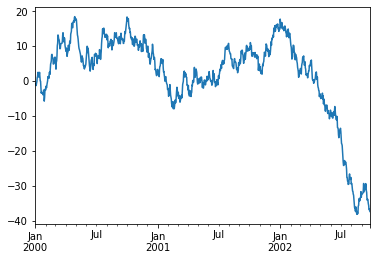

In [92]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

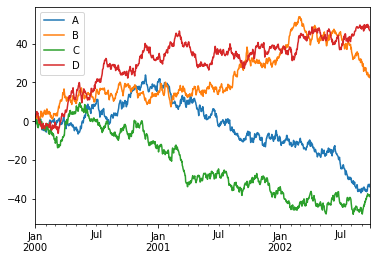

In [93]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In/Out
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv).

In [0]:
df.to_csv('foo.csv')

In [95]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.270947,-0.188626,-0.317821,1.719964
1,2000-01-02,-0.333987,0.455385,-0.025290,2.091197
2,2000-01-03,-1.197875,1.436929,-0.322659,2.786931
3,2000-01-04,0.311970,1.445753,0.858867,3.743537
4,2000-01-05,-0.183480,2.014183,0.663175,3.893318
...,...,...,...,...,...
995,2002-09-22,-32.866003,23.021166,-37.985521,49.084261
996,2002-09-23,-33.142222,23.759978,-38.211119,47.534633
997,2002-09-24,-33.947881,22.712165,-38.031271,47.318079
998,2002-09-25,-32.603804,22.512098,-38.985446,46.847588


### HDF5
Reading and writing to [HDFStores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5).

Writing to a HDF5 Store:

In [0]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store:

In [97]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.270947,-0.188626,-0.317821,1.719964
2000-01-02,-0.333987,0.455385,-0.025290,2.091197
2000-01-03,-1.197875,1.436929,-0.322659,2.786931
2000-01-04,0.311970,1.445753,0.858867,3.743537
2000-01-05,-0.183480,2.014183,0.663175,3.893318
...,...,...,...,...
2002-09-22,-32.866003,23.021166,-37.985521,49.084261
2002-09-23,-33.142222,23.759978,-38.211119,47.534633
2002-09-24,-33.947881,22.712165,-38.031271,47.318079
2002-09-25,-32.603804,22.512098,-38.985446,46.847588


### Excel
Reading and writing to [MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel).

Writing to an excel file:

In [0]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file:

In [99]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.270947,-0.188626,-0.317821,1.719964
1,2000-01-02,-0.333987,0.455385,-0.025290,2.091197
2,2000-01-03,-1.197875,1.436929,-0.322659,2.786931
3,2000-01-04,0.311970,1.445753,0.858867,3.743537
4,2000-01-05,-0.183480,2.014183,0.663175,3.893318
...,...,...,...,...,...
995,2002-09-22,-32.866003,23.021166,-37.985521,49.084261
996,2002-09-23,-33.142222,23.759978,-38.211119,47.534633
997,2002-09-24,-33.947881,22.712165,-38.031271,47.318079
998,2002-09-25,-32.603804,22.512098,-38.985446,46.847588


# Gotchas
If you are trying an operation and you see an exception like:

In [100]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: ignored

See[ Comparisons](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.